# From artificial neuron to perceptron(single neural network)
### We will make our first neural network, of one neuron.

* We start by importing the libraries we will need.

* We will work with the [TensorFlow](https://www.tensorflow.org/) library.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from matplotlib.colors import ListedColormap

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers

tf.random.set_seed(0) # for reproducibility, not in production

* We will make an artificial data set with two clusters.

In [2]:
data, labels = make_blobs(n_samples=500,
                          n_features=2,
                          centers=[(-2.5, -2.5), (2, 2)],
                          random_state=13)

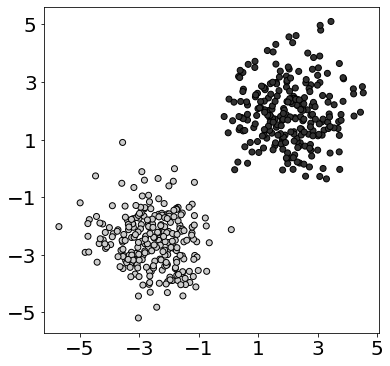

In [3]:
cm_data = ListedColormap(['0.8', '0.2'])

x_min, x_max = data[:, 0].min(), data[:, 0].max()
y_min, y_max = data[:, 1].min(), data[:, 1].max()

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

ax.scatter(data[:, 0], data[:, 1],
           c=labels,
           cmap=cm_data,
           edgecolors='k')

plt.xticks(range(-5, 6, 2))
plt.yticks(range(-5, 6, 2))
plt.tick_params(labelsize=20)

* As we said, we will make a neural network of one neuron.

* We will use the *sigmoid function* as the activation function.

* It's like the step function, except it's smooth.

$$ \sigma(x) = \frac{1}{1 + e^{-x}}$$

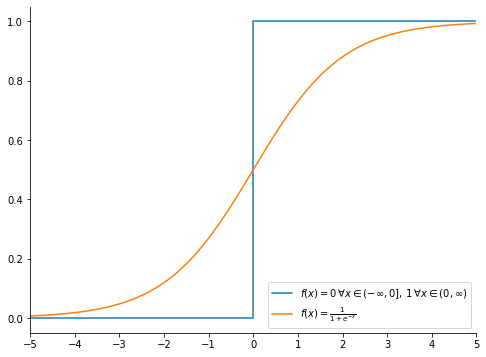

In [4]:
fig = plt.figure(figsize=(8, 6))
ax = plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlim((-5, 5))
plt.xticks(np.arange(-5, 6, 1))
x = np.linspace(-5, 0, 50)
y = np.zeros_like(x)
all_x = np.append(x, -x[::-1])
all_y = np.append(y, np.ones_like(-x[::-1]))
plt.plot(all_x, all_y, label= r"$f(x) = 0\, \forall x \in (-\infty, 0],\, 1\, \forall x \in (0, \infty)$")
all_s_y = 1 / (1 + np.exp(-all_x))
plt.plot(all_x, all_s_y, label=r"$f(x) = \frac{1}{1 + e^{-x}}$")
_ = plt.legend(loc='lower right')

* Here's how we build our trivial neural network.

* The neuron with the sigmoidal activation function is called a *perceptron*.

In [5]:
model = keras.Sequential([
    keras.layers.Dense(1, input_shape=(2,), activation=tf.nn.sigmoid)
])

2022-03-01 14:25:13.267530: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


* We need to define how the neuron will learn the weights and the bias.

* That is, we need to define the optimization algorithm (optimizer).

* We will use our well-known Stochastic Gradient Descent.

* This will find the values ​​of $w_1$, $w_2$, $b$ that minimize the error, i.e. the *loss* (loss).

In [6]:
sgd = optimizers.SGD()

* Then you must:

 1. Connect the optimizer to our network.

 2. Define the loss that the optimization algorithm will try to minimize.

 3. Define how we will measure the performance of the neural network.


* We do these with the `compile()` method.

In [7]:
model.compile(loss='mean_squared_error',
              optimizer=sgd,
              metrics=['accuracy'])

* After doing these, we can train our model.

* We will (again) use the `fit()` method.

* We define the size of the *batch* of samples that the algorithm uses each time to calculate the loss and correct the weights and bias. The default value is 32.

* We also give the number of *epochs* we will train our model. An era is a complete passage from our data.

* If each bundle is of size 10, each season will consist of $500/10 = $50 bundles.

In [8]:
model.fit(data, labels, batch_size=10, epochs=100) 

Epoch 1/100
50/50 [==============================] - 0s 586us/step - loss: 0.8697 - accuracy: 0.0000e+00
Epoch 2/100
50/50 [==============================] - 0s 575us/step - loss: 0.8175 - accuracy: 0.0000e+00
Epoch 3/100
50/50 [==============================] - 0s 559us/step - loss: 0.6923 - accuracy: 0.0000e+00
Epoch 4/100
50/50 [==============================] - 0s 549us/step - loss: 0.3806 - accuracy: 0.1980
Epoch 5/100
50/50 [==============================] - 0s 641us/step - loss: 0.1282 - accuracy: 0.9780
Epoch 6/100
50/50 [==============================] - 0s 607us/step - loss: 0.0634 - accuracy: 1.0000
Epoch 7/100
50/50 [==============================] - 0s 584us/step - loss: 0.0421 - accuracy: 1.0000
Epoch 8/100
50/50 [==============================] - 0s 580us/step - loss: 0.0319 - accuracy: 1.0000
Epoch 9/100
50/50 [==============================] - 0s 603us/step - loss: 0.0259 - accuracy: 1.0000
Epoch 10/100
50/50 [==============================] - 0s 572us/step - loss: 0.0

50/50 [==============================] - 0s 518us/step - loss: 0.0029 - accuracy: 1.0000
Epoch 82/100
50/50 [==============================] - 0s 512us/step - loss: 0.0029 - accuracy: 1.0000
Epoch 83/100
50/50 [==============================] - 0s 525us/step - loss: 0.0028 - accuracy: 1.0000
Epoch 84/100
50/50 [==============================] - 0s 537us/step - loss: 0.0028 - accuracy: 1.0000
Epoch 85/100
50/50 [==============================] - 0s 557us/step - loss: 0.0028 - accuracy: 1.0000
Epoch 86/100
50/50 [==============================] - 0s 515us/step - loss: 0.0028 - accuracy: 1.0000
Epoch 87/100
50/50 [==============================] - 0s 525us/step - loss: 0.0027 - accuracy: 1.0000
Epoch 88/100
50/50 [==============================] - 0s 516us/step - loss: 0.0027 - accuracy: 1.0000
Epoch 89/100
50/50 [==============================] - 0s 596us/step - loss: 0.0027 - accuracy: 1.0000
Epoch 90/100
50/50 [==============================] - 0s 557us/step - loss: 0.0027 - accuracy: 

* To visualize the results we will predict the values ​​for the entire range of $x$ and $y$.

In [9]:
offset = 0.5

x_min, x_max = data[:, 0].min() - offset, data[:, 0].max() + offset
y_min, y_max = data[:, 1].min() - offset, data[:, 1].max() + offset

h = .05  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max+h, h),
                     np.arange(y_min, y_max+h, h))

predictions = model.predict(np.c_[xx.ravel(), yy.ravel()])

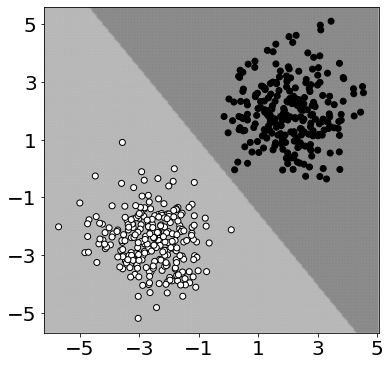

In [10]:
z = predictions.reshape(xx.shape)

cm_mesh = ListedColormap(['0.7', '0.5'])
cm_data_mesh = ListedColormap(['1.0', '0.0'])

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

ax.pcolormesh(xx, yy, z,
              cmap=cm_mesh,
              shading='gouraud',
              alpha=0.4)

ax.scatter(data[:, 0], data[:, 1],
           c=labels,
           cmap=cm_data_mesh,
           linewidth=1,
           edgecolors='k')

plt.xticks(range(-5, 6, 2))
plt.yticks(range(-5, 6, 2))
plt.tick_params(labelsize=20)

* After training, the neural network has learned the weights and biases corresponding to the training data.

* We can extract these values ​​from our model.

In [11]:
for layer in model.layers:
    weights, bias = layer.get_weights()
    print('weights: ', ' '.join([str(round(x[0], 2)) for x in weights]))
    print('bias: ', round(bias[0], 2))

weights:  1.05 0.84
bias:  0.23


* We built a neuron that calculates the function:

 $$ y = \sigma(x_1 w_1 + x_2 w_2 + b) $$

* We found this by successively correcting the weights and bias based on the loss of predictions. (And this is based on derivatives.)

* The above is a linear combination.

* More generally, a perceptron can solve the classification problem on linearly separable data.